In [1]:
# library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Niket\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\Niket\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\Niket\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\Niket\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
# loading the data and printing the samples
vehicle_data = pd.read_csv('vehicle.csv')
vehicle_data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
# printing the shape of the data
vehicle_data.shape

(846, 19)

As this dataset contains 18 attributes to analyze we use the subplots to visualize the data
and start analyzing attributes one by one to get the meaningful information from the attributes

# Finding the missing values and filling the missing values

In [16]:
# first we get the data type of each attribute
vehicle_data.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [18]:
vehicle_data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [19]:
vehicle_data.circularity.unique()

array([48., 41., 50., 44., nan, 43., 34., 36., 46., 42., 49., 55., 54.,
       56., 47., 37., 39., 53., 45., 38., 35., 40., 59., 52., 51., 58.,
       57., 33.])

Hence there are null values in the dataset, we use preprocessing technique to fill the missing values.

In [4]:
vehicle_data = vehicle_data.fillna(vehicle_data.mean())

In [5]:
vehicle_data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

We removed all the missing values and we filled it with median value to fill the data.

# We start doing some exploratory data analysis

so from the shape and the data we have printed will get to know that there are 18 columns to be analyzed to get the classification of last column "Class"

In [4]:
cols = vehicle_data.columns

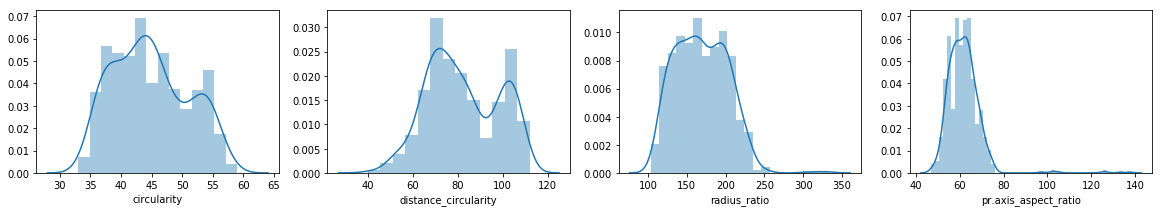

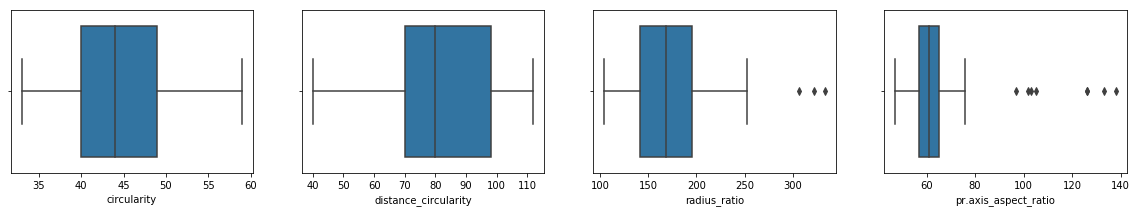

In [22]:
plt.figure(figsize=(20,3))
plt.subplot(1, 4, 1)
sns.distplot(vehicle_data[cols[1]])

plt.subplot(1, 4, 2)
sns.distplot(vehicle_data[cols[2]])

plt.subplot(1, 4, 3)
sns.distplot(vehicle_data[cols[3]])

plt.subplot(1, 4, 4)
sns.distplot(vehicle_data[cols[4]])

plt.figure(figsize=(20, 3))
plt.subplot(1, 4, 1)
sns.boxplot(vehicle_data[cols[1]])

plt.subplot(1, 4, 2)
sns.boxplot(vehicle_data[cols[2]])

plt.subplot(1, 4, 3)
sns.boxplot(vehicle_data[cols[3]])

plt.subplot(1, 4, 4)
sns.boxplot(vehicle_data[cols[4]])

#### circularity and distance_circularity is distrubuted accross.

#### Most of the radius_ratio is distributed from 100 to 250 
#### and there are outliers from 300

#### pr.axis_aspect rario is distributed within the range from 45 to 80 and the outlier are more for this attributes
#### as we can see there are more outliers starting from 90 to 140

# We study few more attributes

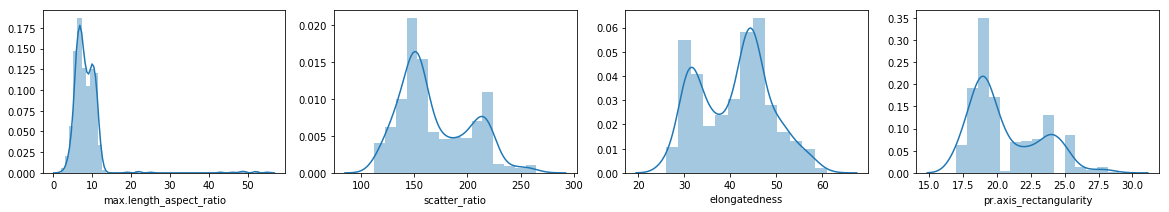

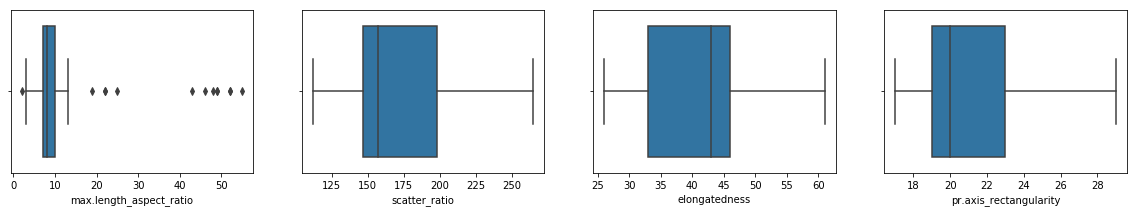

In [25]:
plt.figure(figsize=(20,3))
plt.subplot(1, 4, 1)
sns.distplot(vehicle_data[cols[5]])

plt.subplot(1, 4, 2)
sns.distplot(vehicle_data[cols[6]])

plt.subplot(1, 4, 3)
sns.distplot(vehicle_data[cols[7]])

plt.subplot(1, 4, 4)
sns.distplot(vehicle_data[cols[8]])

plt.figure(figsize=(20,3))
plt.subplot(1, 4, 1)
sns.boxplot(vehicle_data[cols[5]])

plt.subplot(1, 4, 2)
sns.boxplot(vehicle_data[cols[6]])

plt.subplot(1, 4, 3)
sns.boxplot(vehicle_data[cols[7]])

plt.subplot(1, 4, 4)
sns.boxplot(vehicle_data[cols[8]])

##### max.length_aspect_ration is most skewed attribute it has lot of outlirs after 12 

##### Rest of the attributes distributed normally. 

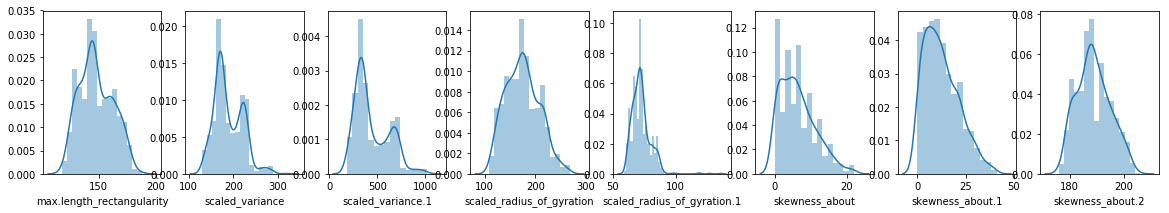

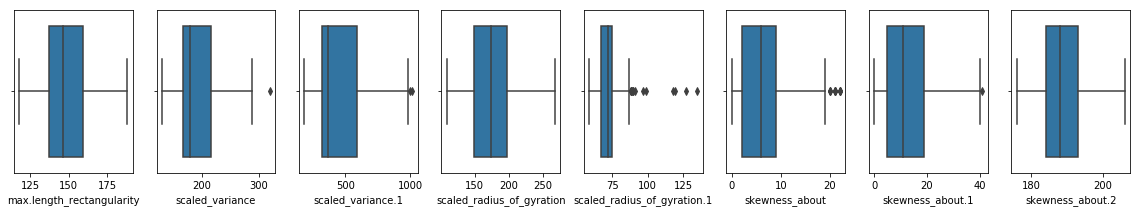

In [27]:
plt.figure(figsize=(20,3))
plt.subplot(1, 8, 1)
sns.distplot(vehicle_data[cols[9]])

plt.subplot(1, 8, 2)
sns.distplot(vehicle_data[cols[10]])

plt.subplot(1, 8, 3)
sns.distplot(vehicle_data[cols[11]])

plt.subplot(1, 8, 4)
sns.distplot(vehicle_data[cols[12]])

plt.subplot(1, 8, 5)
sns.distplot(vehicle_data[cols[13]])

plt.subplot(1, 8, 6)
sns.distplot(vehicle_data[cols[14]])

plt.subplot(1, 8, 7)
sns.distplot(vehicle_data[cols[15]])

plt.subplot(1, 8, 8)
sns.distplot(vehicle_data[cols[16]])

plt.figure(figsize=(20,3))
plt.subplot(1, 8, 1)
sns.boxplot(vehicle_data[cols[9]])

plt.subplot(1, 8, 2)
sns.boxplot(vehicle_data[cols[10]])

plt.subplot(1, 8, 3)
sns.boxplot(vehicle_data[cols[11]])

plt.subplot(1, 8, 4)
sns.boxplot(vehicle_data[cols[12]])

plt.subplot(1, 8, 5)
sns.boxplot(vehicle_data[cols[13]])

plt.subplot(1, 8, 6)
sns.boxplot(vehicle_data[cols[14]])

plt.subplot(1, 8, 7)
sns.boxplot(vehicle_data[cols[15]])

plt.subplot(1, 8, 8)
sns.boxplot(vehicle_data[cols[16]])


#### There are two more attributes scaled_radius_of_gyration.1 and skewness_about which are skewed in on direction and have more outliers

# Multivariate analysis

C:\Users\Niket\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


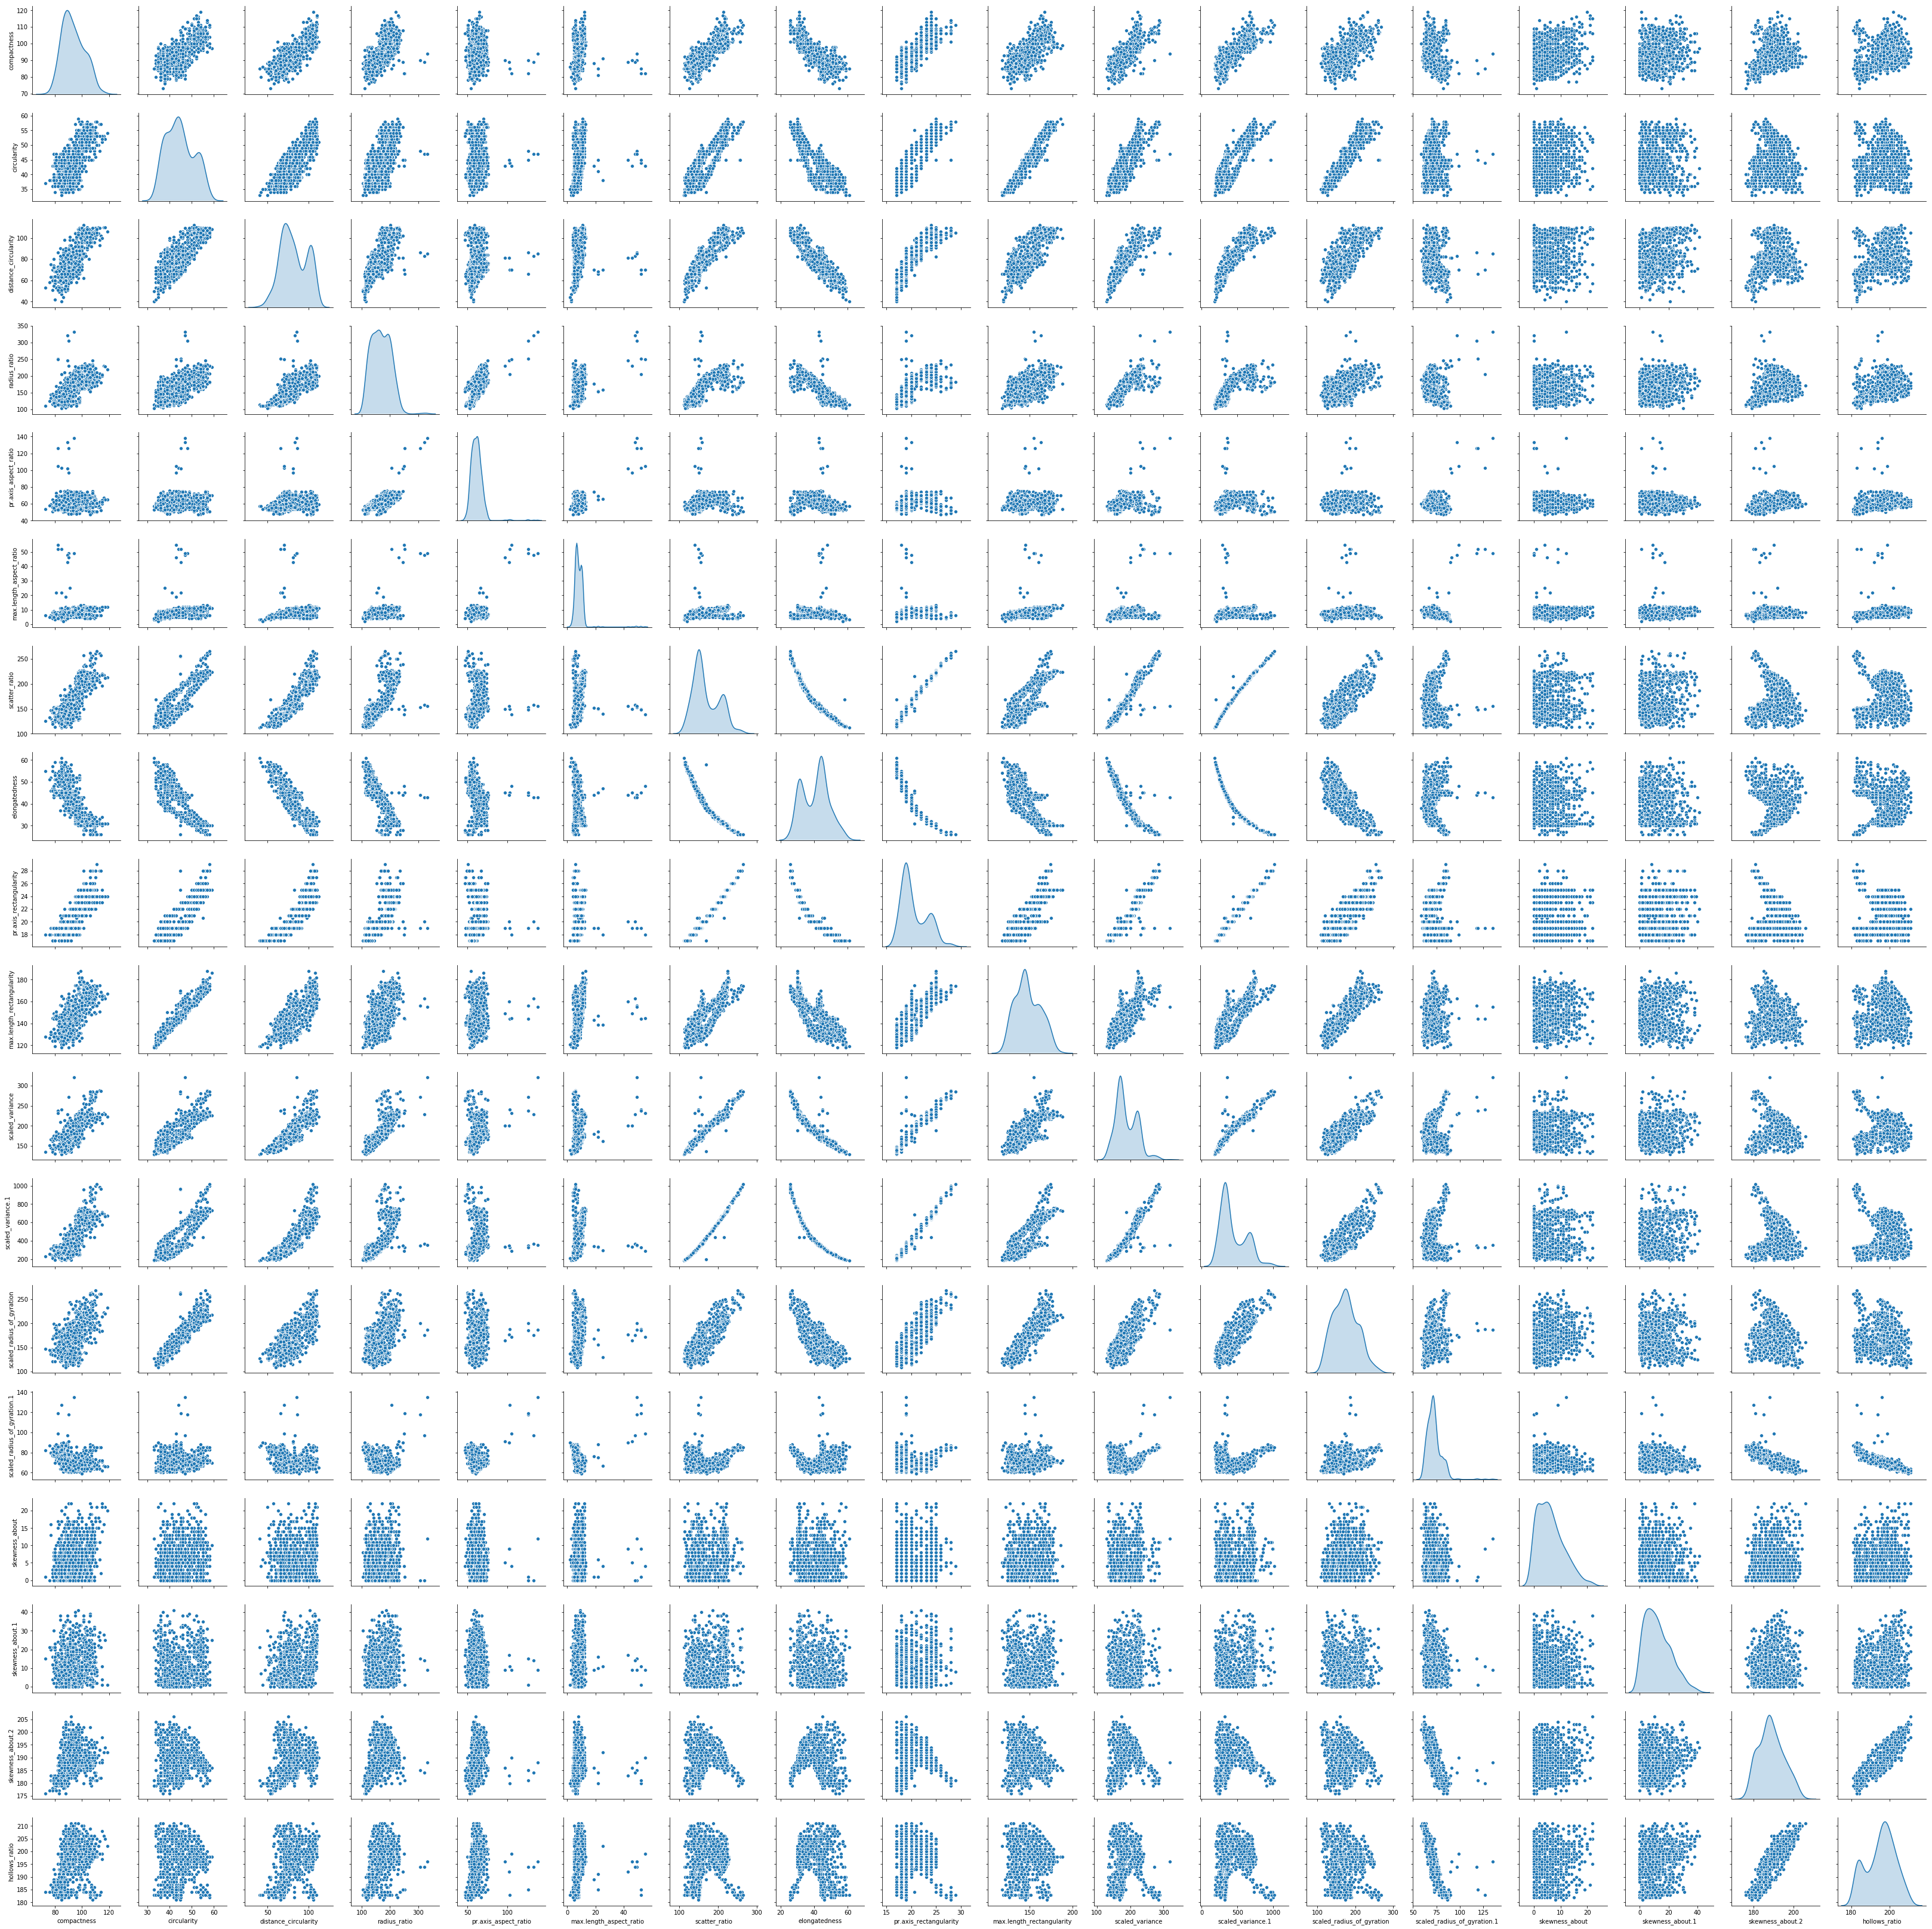

In [30]:
# we use the pairplot to find the correlation of the attributes
sns.pairplot(vehicle_data, diag_kind = 'kde')

#### by the pairplot we get to know that few attribute are more correlated so we check there exact correlation by heat map.

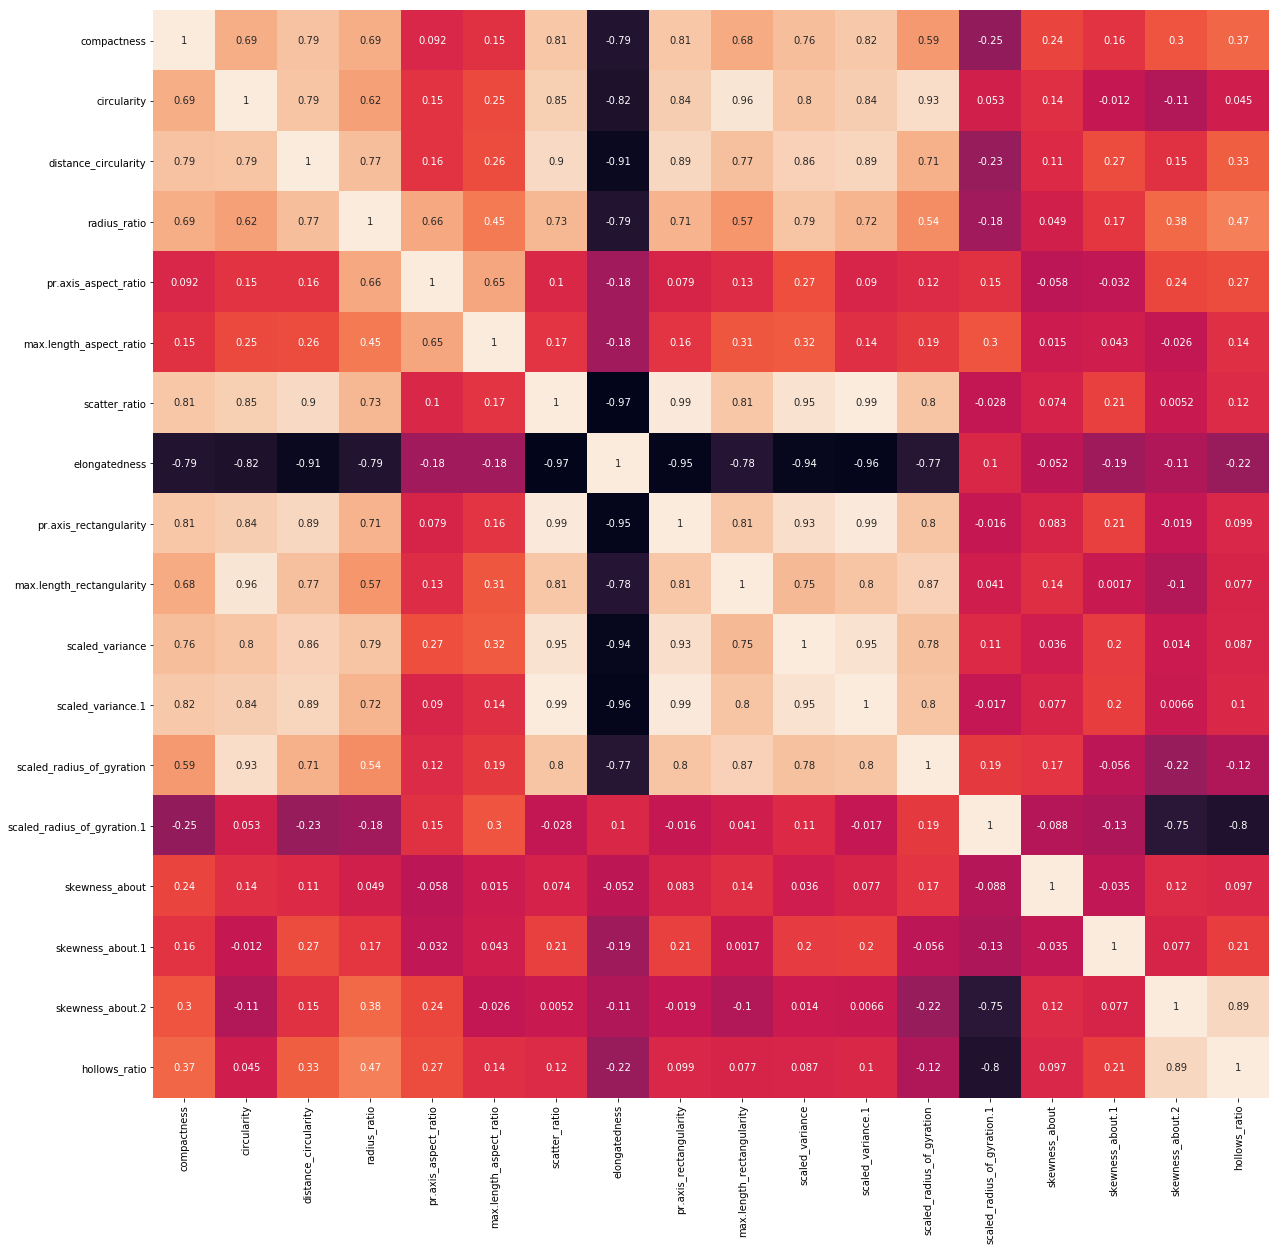

In [39]:
plt.figure(figsize=(20, 20))
sns.heatmap(vehicle_data.corr(), annot = True, cbar = False)

#### Lets see the attributes which are higly correlated.

In [6]:
corr_matrix = vehicle_data.corr().abs()
corr_matrix = corr_matrix.unstack()
corr_matrix = corr_matrix.sort_values(kind = 'quicksort', ascending = False)
#corr_df = pd.DataFrame(corr_matrix, columns = ['Attribute 1', 'Attribute 2'])
corr_matrix[18: 50]

scaled_variance.1          scatter_ratio                0.993784
scatter_ratio              scaled_variance.1            0.993784
pr.axis_rectangularity     scaled_variance.1            0.989490
scaled_variance.1          pr.axis_rectangularity       0.989490
pr.axis_rectangularity     scatter_ratio                0.989370
scatter_ratio              pr.axis_rectangularity       0.989370
                           elongatedness                0.970723
elongatedness              scatter_ratio                0.970723
circularity                max.length_rectangularity    0.961943
max.length_rectangularity  circularity                  0.961943
elongatedness              scaled_variance.1            0.955074
scaled_variance.1          elongatedness                0.955074
pr.axis_rectangularity     elongatedness                0.949077
elongatedness              pr.axis_rectangularity       0.949077
scatter_ratio              scaled_variance              0.948296
scaled_variance          

### Now we remove the outliers from the dataset 

In [7]:

Q1 = vehicle_data.quantile(0.25)
Q3 = vehicle_data.quantile(0.75)
IQR = Q3 - Q1
outliers = 1.5 * IQR
outliers2 = 1.5 * IQR

In [8]:
vehicle_data_attributes = vehicle_data

In [9]:
vehicle_data_attributes['class'] = vehicle_data['class'].replace({'van': 1, 'car': 2, 'bus': 3})

In [10]:
vehicle_data_filtered = vehicle_data_attributes[~((vehicle_data_attributes < (Q1 - 1.5 * IQR)) |(vehicle_data_attributes > (Q3 + 1.5 * IQR))).any(axis=1)]

In [134]:
vehicle_data.shape

(846, 19)

In [11]:
vehicle_data_filtered.shape

(813, 19)

# Splitting the data into training and test data.

In [12]:
X = vehicle_data_filtered
y = vehicle_data_filtered['class']

# we split the test data to 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [138]:
X_train.shape

(569, 19)

In [141]:
X_test.shape

(244, 19)

# Applying the classification algorithms and testing the results.

In [13]:
# fitting the logistic regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [144]:
# checking the score with both training and test set
print(log_reg.score(X_train, y_train))
print(log_reg.score(X_test, y_test))

0.9859402460456942
0.9754098360655737


# Now we compare the model by applying PCA

In [14]:
# Scale the varible so that we normalize the attributes
from scipy.stats import zscore
X_scaled = X.apply(zscore)

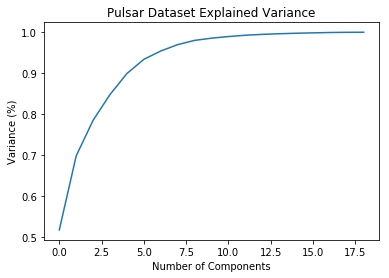

In [81]:
pca = PCA().fit(X_scaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

#### The attributes 5 to 7 covers approx 95% of variance

In [54]:
# Applying the PCA with 6 components
pca = PCA(n_components = 6)
pca.fit(X_scaled)
Xpca3 = pca.transform(X_scaled)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(Xpca3, y, test_size = 0.3)

In [56]:
log_reg.fit(X_train, y_train)

C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [57]:
# checking the score with both training and test set
print(log_reg.score(X_train, y_train))
print(log_reg.score(X_test, y_test))

0.9543057996485061
0.9672131147540983


In [19]:
# Applying the PCA with 2 components
pca = PCA(n_components = 5)
pca.fit(X_scaled)
Xpca3 = pca.transform(X_scaled)

In [191]:
X_train, X_test, y_train, y_test = train_test_split(Xpca3, y, test_size = 0.3)

In [192]:
log_reg.fit(X_train, y_train)

C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
print(log_reg.score(X_train, y_train))
print(log_reg.score(X_test, y_test))

0.9578207381370826
0.9426229508196722


#### PCA with 5 components will be the best fit for this model as there will not overfit but having all the attributes is performing best with this data.
#### we can conclude that reducing PCA does fits the best but for this data it is fitting well without PCA.

# Lets try with SVM classifier to tune and get the good accuracy

In [24]:
from sklearn.svm import SVC
svc = SVC(C = 0.001, gamma = 0.1)
svc.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.5131810193321616
0.5081967213114754


In [28]:
from sklearn.svm import SVC
svc = SVC(C = 0.05, gamma = 0.1)
svc.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.875219683655536
0.8442622950819673


In [30]:
from sklearn.svm import SVC
svc = SVC(C = 0.5, gamma = 0.1)
svc.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9964850615114236
0.9754098360655737


In [44]:
from sklearn.svm import SVC
svc = SVC(C = 1, gamma = 0.1)
svc.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9964850615114236
0.9836065573770492


In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[ 64,   0,   0],
       [  2, 120,   2],
       [  0,   0,  56]], dtype=int64)

In [51]:
cm = confusion_matrix(y_train, y_pred_train)
cm

array([[125,   0,   0],
       [  1, 290,   1],
       [  0,   0, 152]], dtype=int64)

#### using svm we tuned the hyper parameter and tested the accuracy the SVM parameter C = 1 and gamma = 0.1
#### is giving the most acuurate pridictions as from above confusion matrix we can see that from training set errors to test set errors there is only small difference. which is very close to trainig set
#### So we can conclude that using PCA to extract the feature, only 5 attributes helped to predict with 98% accuracy